### Libraries

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# (Optional) If you're working inside Jupyter
%load_ext autoreload
%autoreload 2
%matplotlib inline



In [2]:
%env CUDA_VISIBLE_DEVICES=4

env: CUDA_VISIBLE_DEVICES=4


In [4]:
!echo $CUDA_VISIBLE_DEVICES

4


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
from data_processor_v2 import DataProcessorUpdated

processor = DataProcessorUpdated()

In [8]:
processor.load_and_clean_data()

2023-12-31 23:00:00


/ephnvme/weiliang/synthesis-data/energy-prediction/pytorch/data_processor_v2.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_col] = pd.to_datetime(df[time_col])


2024-01-01 23:00:00
2023-12-31 23:00:00
2023-12-31 23:00:00


In [9]:
processor.combine_all_data()

In [10]:
processor.df

,DAP_SystemLambda,SCED_system_lambda,Fuel_coal_and_lignite,Fuel_hydro,Fuel_nuclear,Fuel_power_storage,Fuel_solar,Fuel_wind,Fuel_natural_gas,Fuel_other,Load_load,delta_price
2019-01-01 00:00:00,NaN,13.837562,6116.419040,185.465296,3895.951940,0.0,0.0,14311.36445,12512.80815,2.534772,36951.0,NaN
2019-01-01 01:00:00,NaN,15.464869,6423.242360,186.667008,3894.973176,0.0,0.0,14298.52586,12434.13638,2.947464,37112.0,NaN
2019-01-01 02:00:00,NaN,15.487720,6309.280752,187.408832,3894.733152,0.0,0.0,14030.82875,12797.25831,-1.954544,37154.0,NaN
2019-01-01 03:00:00,NaN,15.770092,6416.671292,187.817564,3894.714576,0.0,0.0,13610.13937,13279.01803,1.887324,37283.0,NaN
2019-01-01 04:00:00,NaN,16.036085,6569.580884,186.990116,3892.748912,0.0,0.0,13414.14969,13585.26799,-0.201100,37817.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 19:00:00,23.1651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 20:00:00,23.2113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 21:00:00,21.3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 22:00:00,20.3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
processor.shift_dap()

In [12]:
processor.df

,DAP_SystemLambda,SCED_system_lambda,Fuel_coal_and_lignite,Fuel_hydro,Fuel_nuclear,Fuel_power_storage,Fuel_solar,Fuel_wind,Fuel_natural_gas,Fuel_other,Load_load,delta_price
2019-01-01 00:00:00,23.9250,13.837562,6116.419040,185.465296,3895.951940,0.0,0.0,14311.36445,12512.80815,2.534772,36951.0,NaN
2019-01-01 01:00:00,23.3140,15.464869,6423.242360,186.667008,3894.973176,0.0,0.0,14298.52586,12434.13638,2.947464,37112.0,NaN
2019-01-01 02:00:00,23.3475,15.487720,6309.280752,187.408832,3894.733152,0.0,0.0,14030.82875,12797.25831,-1.954544,37154.0,NaN
2019-01-01 03:00:00,23.0595,15.770092,6416.671292,187.817564,3894.714576,0.0,0.0,13610.13937,13279.01803,1.887324,37283.0,NaN
2019-01-01 04:00:00,25.2672,16.036085,6569.580884,186.990116,3892.748912,0.0,0.0,13414.14969,13585.26799,-0.201100,37817.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
processor.split_data(feature_columns=['DAP_SystemLambda', 'SCED_system_lambda', 'Load_load'])

In [14]:
processor.standardize_data()

In [15]:
processor.shift_data()

In [16]:
df, x_train_lstm, y_train_lstm, x_val_lstm, y_val_lstm, x_test_lstm, y_test_lstm = processor.get_data()

In [17]:
x_train_lstm.shape

(26089, 168, 3)

In [18]:
y_train_lstm.shape

(26089, 24, 1)

In [19]:
y_val_lstm.shape

(8401, 24, 1)

In [20]:
y_train_lstm = np.squeeze(y_train_lstm, axis=-1)   # becomes (8401, 24)
y_val_lstm = np.squeeze(y_val_lstm, axis=-1)       # same
y_test_lstm = np.squeeze(y_test_lstm, axis=-1)

# Model Building

In [42]:
from LSTM import LSTMModel  # assuming you saved your class as LSTM.py

# Example data shapes
input_size = x_train_lstm.shape[2]   # number of features per timestep (e.g., 5)
output_size = y_train_lstm.shape[1]  # number of output values (e.g., 24 hours)

# Create model
new_model = LSTMModel(
    input_size=input_size,
    hidden_size=512,          # you can adjust, 512 is a good start
    output_size=output_size,
    num_layers=3,             # deeper model (recommend 2 layers for LSTM)
    dropout=0.1               # optional regularization
)

new_model.to(device)


LSTMModel(
  (lstm): LSTM(3, 512, num_layers=3, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=512, out_features=24, bias=True)
)

In [43]:
from ModelTrainer import ModelTrainer
from losses import fluctuation_loss  # or define it above in your notebook

trainer = ModelTrainer(
    model=new_model,
    features_training_data=x_train_lstm,
    target_training_data=y_train_lstm,
    features_eval_data=x_val_lstm,
    target_eval_data=y_val_lstm,
    device=device,
    loss_fn=lambda pred, target: fluctuation_loss(pred, target, alpha=0.2)
)


trainer.train(epochs=100, batch_size=32, patience=50, learning_rate=1e-4)


Epoch 1: Train Loss = 0.7568, Eval Loss = 0.2681
Epoch 2: Train Loss = 0.6597, Eval Loss = 0.2595
Epoch 3: Train Loss = 0.6476, Eval Loss = 0.2623
Epoch 4: Train Loss = 0.6466, Eval Loss = 0.2719
Epoch 5: Train Loss = 0.6200, Eval Loss = 0.2647
Epoch 6: Train Loss = 0.6121, Eval Loss = 0.2662
Epoch 7: Train Loss = 0.5712, Eval Loss = 0.2611
Epoch 8: Train Loss = 0.5368, Eval Loss = 0.2597
Epoch 9: Train Loss = 0.5613, Eval Loss = 0.2729
Epoch 10: Train Loss = 0.6332, Eval Loss = 0.2802
Epoch 11: Train Loss = 0.6431, Eval Loss = 0.2606
Epoch 12: Train Loss = 0.6094, Eval Loss = 0.2586
Epoch 13: Train Loss = 0.5786, Eval Loss = 0.2558
Epoch 14: Train Loss = 0.5226, Eval Loss = 0.2572
Epoch 15: Train Loss = 0.5312, Eval Loss = 0.2544
Epoch 16: Train Loss = 0.4972, Eval Loss = 0.2522
Epoch 17: Train Loss = 0.4863, Eval Loss = 0.2504
Epoch 18: Train Loss = 0.4789, Eval Loss = 0.2520
Epoch 19: Train Loss = 0.4701, Eval Loss = 0.2519
Epoch 20: Train Loss = 0.4659, Eval Loss = 0.2475
Epoch 21:

In [44]:
loss = trainer.history
with open('LSTM_Bad3.csv', 'w') as f:
    pd.DataFrame(loss).to_csv(f, index=False)

In [85]:
loss_1 = pd.read_csv('LSTM_Bad3.csv')
loss_2 = pd.read_csv('LSTM_Bad2.csv')
loss_3 = pd.read_csv('LSTM_Bad.csv')
loss_0 = pd.read_csv('LSTM_Best.csv')


In [86]:

loss_0 = loss_0['eval_loss']
loss_1 = loss_1['eval_loss']
loss_2 = loss_2['eval_loss']
loss_3 = loss_3['eval_loss']


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curves(
    histories,
    labels=None,
    fmts=None,
    figsize=(10, 6),
    title='Eval Loss Curves',
    xlabel='Epoch',
    ylabel='Loss',
    clip_percentile=None,
    log_scale=False,
    smooth_window=None,
    ylim=None,
    plot_kwargs=None
):
    """
    Plot any number of loss curves with options to clip, log‐scale, and smooth.

    Parameters:
    - histories: list of lists (or 1D arrays) of loss values
    - labels:    list of str labels, length == len(histories)
    - fmts:      list of fmt strings for each curve (e.g. ['-o','--s',':d'])
    - figsize:   tuple for fig size
    - title:     plot title
    - xlabel:    x‐axis label
    - ylabel:    y‐axis label
    - clip_percentile: float in (0,100), percentile to clip top losses
    - log_scale: bool, use log scale on y‐axis
    - smooth_window: int, window size for rolling mean smoothing
    - ylim:      tuple (ymin, ymax) to force axis limits
    - plot_kwargs: dict mapping curve index (0-based) → dict of plt.plot kwargs
    """
    n = len(histories)
    labels = labels or [f'Loss {i+1}' for i in range(n)]
    # default fmt cycle
    default_fmts = ['-o','--s','-.^',':d','-x','-+']
    fmts = fmts or default_fmts[:n]
    plot_kwargs = plot_kwargs or {}

    # optional smoothing
    def maybe_smooth(h):
        if smooth_window and smooth_window > 1:
            return pd.Series(h).rolling(smooth_window, min_periods=1, center=True).mean().to_list()
        return h

    H = [maybe_smooth(h) for h in histories]
    epochs = [range(1, len(h) + 1) for h in H]

    plt.figure(figsize=figsize)
    for idx, (ep, hist) in enumerate(zip(epochs, H)):
        kw = plot_kwargs.get(idx, {})
        plt.plot(ep, hist, fmts[idx], label=labels[idx], **kw)

    if clip_percentile is not None:
        all_vals = np.concatenate(H)
        top = np.percentile(all_vals, clip_percentile)
        plt.ylim(top=top)

    if ylim is not None:
        plt.ylim(ylim)

    if log_scale:
        plt.yscale('log')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()


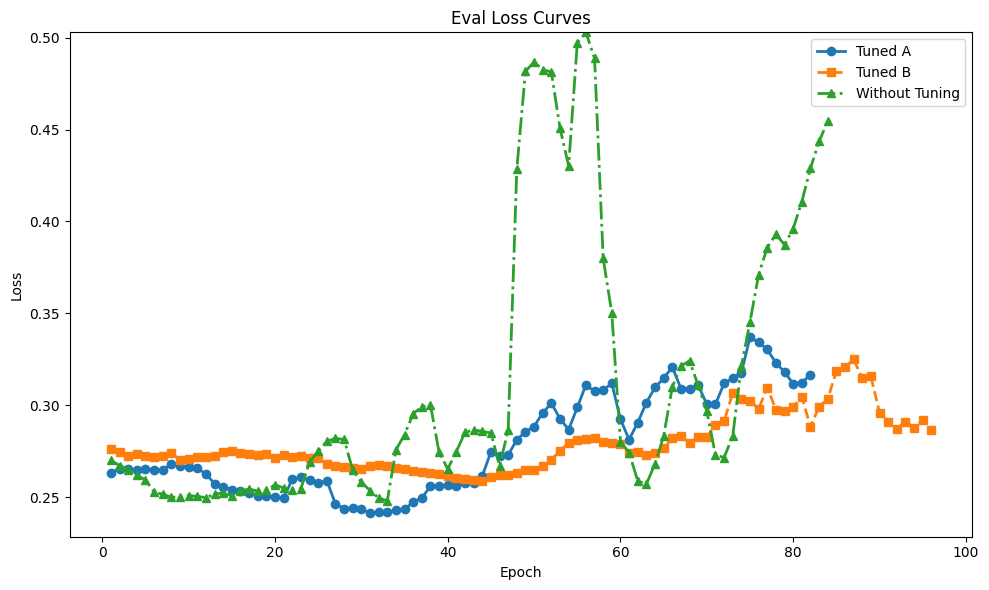

In [91]:
plot_loss_curves(
    [loss_1, loss_3,loss_2],
    labels=['Tuned A','Tuned B','Without Tuning'],
    fmts=['-o','--s','-.^'],
    clip_percentile=100,
    smooth_window=5,
    plot_kwargs={
        0: {'linewidth':2},
        1: {'linewidth':2},
        2: {'linewidth':2}
    }
)


In [29]:

study = optuna.create_study(
    direction="minimize",
    pruner=optuna.pruners.HyperbandPruner()
)
study.optimize(objective, n_trials=50)


[I 2025-05-12 19:56:31,701] A new study created in memory with name: no-name-489919c1-75db-4e34-b141-003c6da94e47


/ephnvme/weiliang/cache/tmpdir/ipykernel_177578/2487477568.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr    = trial.suggest_loguniform("lr", 1e-5, 1e-3)


Epoch 1: Train Loss = 0.8071, Eval Loss = 0.2777
Epoch 2: Train Loss = 0.6969, Eval Loss = 0.2756
Epoch 3: Train Loss = 0.6656, Eval Loss = 0.2712
Epoch 4: Train Loss = 0.6597, Eval Loss = 0.2708
Epoch 5: Train Loss = 0.6536, Eval Loss = 0.2644
Epoch 6: Train Loss = 0.6521, Eval Loss = 0.2665
Epoch 7: Train Loss = 0.6450, Eval Loss = 0.2618
Epoch 8: Train Loss = 0.6363, Eval Loss = 0.2589
Epoch 9: Train Loss = 0.6352, Eval Loss = 0.2658
Epoch 10: Train Loss = 0.6105, Eval Loss = 0.2673
Epoch 11: Train Loss = 0.5869, Eval Loss = 0.2616
Epoch 12: Train Loss = 0.5502, Eval Loss = 0.2802
Epoch 13: Train Loss = 0.5345, Eval Loss = 0.2811
Epoch 14: Train Loss = 0.5099, Eval Loss = 0.2708
Epoch 15: Train Loss = 0.4959, Eval Loss = 0.2683
Epoch 16: Train Loss = 0.4876, Eval Loss = 0.2663
Epoch 17: Train Loss = 0.4888, Eval Loss = 0.2653


[I 2025-05-12 19:56:56,661] Trial 0 finished with value: 0.26855725049972534 and parameters: {'hidden_size': 128, 'num_layers': 1, 'dropout': 0.07594979695841358, 'lr': 0.0004988162276472004, 'alpha': 0.274039689943281}. Best is trial 0 with value: 0.26855725049972534.


Epoch 18: Train Loss = 0.4701, Eval Loss = 0.2686
Early stopping triggered at epoch 18
Epoch 1: Train Loss = 0.7962, Eval Loss = 0.2808
Epoch 2: Train Loss = 0.6918, Eval Loss = 0.2812
Epoch 3: Train Loss = 0.6852, Eval Loss = 0.2731
Epoch 4: Train Loss = 0.6756, Eval Loss = 0.2709
Epoch 5: Train Loss = 0.6599, Eval Loss = 0.2713
Epoch 6: Train Loss = 0.6506, Eval Loss = 0.2645
Epoch 7: Train Loss = 0.6321, Eval Loss = 0.2659
Epoch 8: Train Loss = 0.6544, Eval Loss = 0.2702
Epoch 9: Train Loss = 0.6184, Eval Loss = 0.2808
Epoch 10: Train Loss = 0.5636, Eval Loss = 0.2639
Epoch 11: Train Loss = 0.6054, Eval Loss = 0.2761
Epoch 12: Train Loss = 0.5418, Eval Loss = 0.2755
Epoch 13: Train Loss = 0.5300, Eval Loss = 0.3195
Epoch 14: Train Loss = 0.5165, Eval Loss = 0.2662
Epoch 15: Train Loss = 0.4993, Eval Loss = 0.2745
Epoch 16: Train Loss = 0.6007, Eval Loss = 0.2622
Epoch 17: Train Loss = 0.5325, Eval Loss = 0.2930
Epoch 18: Train Loss = 0.4788, Eval Loss = 0.2746
Epoch 19: Train Loss =

[I 2025-05-12 19:57:42,789] Trial 1 finished with value: 0.32955408096313477 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout': 0.15233018791692476, 'lr': 0.0007434782730140222, 'alpha': 0.29092223133606376}. Best is trial 0 with value: 0.26855725049972534.


Epoch 26: Train Loss = 0.3656, Eval Loss = 0.3296
Early stopping triggered at epoch 26
Epoch 1: Train Loss = 0.7017, Eval Loss = 0.2662
Epoch 2: Train Loss = 0.6526, Eval Loss = 0.2682
Epoch 3: Train Loss = 0.6329, Eval Loss = 0.2534
Epoch 4: Train Loss = 0.6199, Eval Loss = 0.2587
Epoch 5: Train Loss = 0.6272, Eval Loss = 0.2577
Epoch 6: Train Loss = 0.6201, Eval Loss = 0.2541
Epoch 7: Train Loss = 0.5978, Eval Loss = 0.2534
Epoch 8: Train Loss = 0.6006, Eval Loss = 0.2530
Epoch 9: Train Loss = 0.5809, Eval Loss = 0.2456
Epoch 10: Train Loss = 0.5632, Eval Loss = 0.2436
Epoch 11: Train Loss = 0.6434, Eval Loss = 0.2579
Epoch 12: Train Loss = 0.5925, Eval Loss = 0.2556
Epoch 13: Train Loss = 0.5656, Eval Loss = 0.2515
Epoch 14: Train Loss = 0.5176, Eval Loss = 0.2494
Epoch 15: Train Loss = 0.4877, Eval Loss = 0.2488
Epoch 16: Train Loss = 0.4589, Eval Loss = 0.2456
Epoch 17: Train Loss = 0.5012, Eval Loss = 0.2575
Epoch 18: Train Loss = 0.4988, Eval Loss = 0.2570
Epoch 19: Train Loss =

[I 2025-05-12 19:59:09,919] Trial 2 finished with value: 0.2452888935804367 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.4592778664392098, 'lr': 0.0007840097734465758, 'alpha': 0.1897265691467196}. Best is trial 2 with value: 0.2452888935804367.


Epoch 20: Train Loss = 0.3990, Eval Loss = 0.2453
Early stopping triggered at epoch 20
Epoch 1: Train Loss = 0.8530, Eval Loss = 0.3387
Epoch 2: Train Loss = 0.9872, Eval Loss = 0.3122
Epoch 3: Train Loss = 0.8429, Eval Loss = 0.3213
Epoch 4: Train Loss = 0.7494, Eval Loss = 0.3298
Epoch 5: Train Loss = 0.7432, Eval Loss = 0.3125
Epoch 6: Train Loss = 0.7448, Eval Loss = 0.3129
Epoch 7: Train Loss = 0.7322, Eval Loss = 0.3109
Epoch 8: Train Loss = 0.7193, Eval Loss = 0.3114
Epoch 9: Train Loss = 0.7335, Eval Loss = 0.3109
Epoch 10: Train Loss = 0.7425, Eval Loss = 0.6054
Epoch 11: Train Loss = 0.7220, Eval Loss = 0.3121
Epoch 12: Train Loss = 0.7205, Eval Loss = 0.3139
Epoch 13: Train Loss = 0.7000, Eval Loss = 0.3136
Epoch 14: Train Loss = 0.6863, Eval Loss = 0.3095
Epoch 15: Train Loss = 0.6575, Eval Loss = 0.3090
Epoch 16: Train Loss = 0.6620, Eval Loss = 0.3116
Epoch 17: Train Loss = 0.6360, Eval Loss = 0.3091
Epoch 18: Train Loss = 0.6578, Eval Loss = 0.3121
Epoch 19: Train Loss =

[I 2025-05-12 20:06:20,997] Trial 3 finished with value: 0.31552308797836304 and parameters: {'hidden_size': 256, 'num_layers': 3, 'dropout': 0.42951234048733067, 'lr': 0.0008098320616208592, 'alpha': 0.43187532479755264}. Best is trial 2 with value: 0.2452888935804367.


Epoch 46: Train Loss = 0.6852, Eval Loss = 0.3155
Early stopping triggered at epoch 46
Epoch 1: Train Loss = 1.1600, Eval Loss = 0.3003
Epoch 2: Train Loss = 1.0593, Eval Loss = 0.2981
Epoch 3: Train Loss = 0.9949, Eval Loss = 0.2984
Epoch 4: Train Loss = 0.9567, Eval Loss = 0.2977
Epoch 5: Train Loss = 0.9276, Eval Loss = 0.2970
Epoch 6: Train Loss = 0.9034, Eval Loss = 0.2958
Epoch 7: Train Loss = 0.8828, Eval Loss = 0.2959
Epoch 8: Train Loss = 0.8645, Eval Loss = 0.2953
Epoch 9: Train Loss = 0.8486, Eval Loss = 0.2970
Epoch 10: Train Loss = 0.8341, Eval Loss = 0.2965
Epoch 11: Train Loss = 0.8215, Eval Loss = 0.2970
Epoch 12: Train Loss = 0.8099, Eval Loss = 0.2966
Epoch 13: Train Loss = 0.7994, Eval Loss = 0.2959
Epoch 14: Train Loss = 0.7904, Eval Loss = 0.2956
Epoch 15: Train Loss = 0.7813, Eval Loss = 0.2954
Epoch 16: Train Loss = 0.7718, Eval Loss = 0.2953
Epoch 17: Train Loss = 0.7656, Eval Loss = 0.2956
Epoch 18: Train Loss = 0.7562, Eval Loss = 0.2948
Epoch 19: Train Loss =

[I 2025-05-12 20:07:50,883] Trial 4 finished with value: 0.2955563962459564 and parameters: {'hidden_size': 128, 'num_layers': 4, 'dropout': 0.4449751793915866, 'lr': 1.865551615834235e-05, 'alpha': 0.3743880326427548}. Best is trial 2 with value: 0.2452888935804367.


Epoch 28: Train Loss = 0.7003, Eval Loss = 0.2956
Early stopping triggered at epoch 28
Epoch 1: Train Loss = 1.1413, Eval Loss = 0.3005
Epoch 2: Train Loss = 0.9695, Eval Loss = 0.3016
Epoch 3: Train Loss = 0.8789, Eval Loss = 0.3024
Epoch 4: Train Loss = 0.8344, Eval Loss = 0.3029
Epoch 5: Train Loss = 0.8056, Eval Loss = 0.3021
Epoch 6: Train Loss = 0.7847, Eval Loss = 0.3021
Epoch 7: Train Loss = 0.7697, Eval Loss = 0.3022
Epoch 8: Train Loss = 0.7577, Eval Loss = 0.3027
Epoch 9: Train Loss = 0.7462, Eval Loss = 0.3016
Epoch 10: Train Loss = 0.7332, Eval Loss = 0.3020


[I 2025-05-12 20:08:55,492] Trial 5 finished with value: 0.30193638801574707 and parameters: {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.1988881710049717, 'lr': 1.331084573417882e-05, 'alpha': 0.420620781049036}. Best is trial 2 with value: 0.2452888935804367.


Epoch 11: Train Loss = 0.7167, Eval Loss = 0.3019
Early stopping triggered at epoch 11
Epoch 1: Train Loss = 0.9527, Eval Loss = 0.2980
Epoch 2: Train Loss = 0.7809, Eval Loss = 0.2958
Epoch 3: Train Loss = 0.7372, Eval Loss = 0.2936
Epoch 4: Train Loss = 0.7218, Eval Loss = 0.2909
Epoch 5: Train Loss = 0.7108, Eval Loss = 0.2971
Epoch 6: Train Loss = 0.7013, Eval Loss = 0.2962
Epoch 7: Train Loss = 0.6730, Eval Loss = 0.2879
Epoch 8: Train Loss = 0.6964, Eval Loss = 0.2926
Epoch 9: Train Loss = 0.6463, Eval Loss = 0.2854
Epoch 10: Train Loss = 0.6275, Eval Loss = 0.2869
Epoch 11: Train Loss = 0.6156, Eval Loss = 0.2849
Epoch 12: Train Loss = 0.6045, Eval Loss = 0.2829
Epoch 13: Train Loss = 0.5991, Eval Loss = 0.2845
Epoch 14: Train Loss = 0.5932, Eval Loss = 0.2823
Epoch 15: Train Loss = 0.5869, Eval Loss = 0.2819
Epoch 16: Train Loss = 0.6012, Eval Loss = 0.2861
Epoch 17: Train Loss = 0.5793, Eval Loss = 0.3035
Epoch 18: Train Loss = 0.5691, Eval Loss = 0.2816
Epoch 19: Train Loss =

[I 2025-05-12 20:10:08,389] Trial 6 finished with value: 0.3163233697414398 and parameters: {'hidden_size': 128, 'num_layers': 3, 'dropout': 0.3835384329870018, 'lr': 0.0001933200958165291, 'alpha': 0.3762454902244926}. Best is trial 2 with value: 0.2452888935804367.


Epoch 29: Train Loss = 0.5022, Eval Loss = 0.3163
Early stopping triggered at epoch 29
Epoch 1: Train Loss = 1.0945, Eval Loss = 0.2925
Epoch 2: Train Loss = 0.9447, Eval Loss = 0.2922
Epoch 3: Train Loss = 0.8808, Eval Loss = 0.2919
Epoch 4: Train Loss = 0.8388, Eval Loss = 0.2915
Epoch 5: Train Loss = 0.8083, Eval Loss = 0.2912
Epoch 6: Train Loss = 0.7832, Eval Loss = 0.2908
Epoch 7: Train Loss = 0.7643, Eval Loss = 0.2879
Epoch 8: Train Loss = 0.7490, Eval Loss = 0.2890
Epoch 9: Train Loss = 0.7367, Eval Loss = 0.2877
Epoch 10: Train Loss = 0.7227, Eval Loss = 0.2887
Epoch 11: Train Loss = 0.7106, Eval Loss = 0.2903
Epoch 12: Train Loss = 0.6975, Eval Loss = 0.2858
Epoch 13: Train Loss = 0.6933, Eval Loss = 0.2872
Epoch 14: Train Loss = 0.6785, Eval Loss = 0.2876
Epoch 15: Train Loss = 0.6689, Eval Loss = 0.2886
Epoch 16: Train Loss = 0.6609, Eval Loss = 0.2860
Epoch 17: Train Loss = 0.6545, Eval Loss = 0.2853
Epoch 18: Train Loss = 0.6467, Eval Loss = 0.2841
Epoch 19: Train Loss =

[I 2025-05-12 20:12:13,916] Trial 7 finished with value: 0.2753531336784363 and parameters: {'hidden_size': 128, 'num_layers': 3, 'dropout': 0.4427374536488033, 'lr': 4.165697684923875e-05, 'alpha': 0.34361178196561976}. Best is trial 2 with value: 0.2452888935804367.


Epoch 50: Train Loss = 0.5385, Eval Loss = 0.2754
Epoch 1: Train Loss = 0.7745, Eval Loss = 0.2822
Epoch 2: Train Loss = 0.6919, Eval Loss = 0.2791
Epoch 3: Train Loss = 0.6840, Eval Loss = 0.2729
Epoch 4: Train Loss = 0.6686, Eval Loss = 0.2825
Epoch 5: Train Loss = 0.6717, Eval Loss = 0.2707
Epoch 6: Train Loss = 0.6553, Eval Loss = 0.2710
Epoch 7: Train Loss = 0.6556, Eval Loss = 0.2737
Epoch 8: Train Loss = 0.6380, Eval Loss = 0.2741
Epoch 9: Train Loss = 0.6260, Eval Loss = 0.2687
Epoch 10: Train Loss = 0.6273, Eval Loss = 0.2730
Epoch 11: Train Loss = 0.5803, Eval Loss = 0.2674
Epoch 12: Train Loss = 0.6077, Eval Loss = 0.2800
Epoch 13: Train Loss = 0.6453, Eval Loss = 0.2680
Epoch 14: Train Loss = 0.6565, Eval Loss = 0.2782
Epoch 15: Train Loss = 0.6133, Eval Loss = 0.2792
Epoch 16: Train Loss = 0.5965, Eval Loss = 0.2969
Epoch 17: Train Loss = 0.6088, Eval Loss = 0.2763
Epoch 18: Train Loss = 0.5677, Eval Loss = 0.2836
Epoch 19: Train Loss = 0.5841, Eval Loss = 0.2843
Epoch 20:

[I 2025-05-12 20:13:45,701] Trial 8 finished with value: 0.27479806542396545 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.19995365266789378, 'lr': 0.0009328865311567007, 'alpha': 0.3139951220472682}. Best is trial 2 with value: 0.2452888935804367.


Epoch 21: Train Loss = 0.4744, Eval Loss = 0.2748
Early stopping triggered at epoch 21
Epoch 1: Train Loss = 0.8002, Eval Loss = 0.2734
Epoch 2: Train Loss = 0.6804, Eval Loss = 0.2763
Epoch 3: Train Loss = 0.6791, Eval Loss = 0.2711
Epoch 4: Train Loss = 0.6538, Eval Loss = 0.2716
Epoch 5: Train Loss = 0.6562, Eval Loss = 0.2704
Epoch 6: Train Loss = 0.6396, Eval Loss = 0.2693
Epoch 7: Train Loss = 0.6459, Eval Loss = 0.2634
Epoch 8: Train Loss = 0.6443, Eval Loss = 0.2611
Epoch 9: Train Loss = 0.6009, Eval Loss = 0.2613
Epoch 10: Train Loss = 0.5472, Eval Loss = 0.2640
Epoch 11: Train Loss = 0.5213, Eval Loss = 0.2648
Epoch 12: Train Loss = 0.4891, Eval Loss = 0.2596
Epoch 13: Train Loss = 0.5194, Eval Loss = 0.2589
Epoch 14: Train Loss = 0.4577, Eval Loss = 0.2561
Epoch 15: Train Loss = 0.4451, Eval Loss = 0.2561
Epoch 16: Train Loss = 0.4367, Eval Loss = 0.2541
Epoch 17: Train Loss = 0.4206, Eval Loss = 0.2565
Epoch 18: Train Loss = 0.4039, Eval Loss = 0.2562
Epoch 19: Train Loss =

[I 2025-05-12 20:18:18,480] Trial 9 finished with value: 0.2463778555393219 and parameters: {'hidden_size': 512, 'num_layers': 2, 'dropout': 0.1251138359674111, 'lr': 9.490890777853932e-05, 'alpha': 0.24245661066108384}. Best is trial 2 with value: 0.2452888935804367.


Epoch 32: Train Loss = 0.3106, Eval Loss = 0.2464
Early stopping triggered at epoch 32
Epoch 1: Train Loss = 0.7181, Eval Loss = 0.2578
Epoch 2: Train Loss = 0.6201, Eval Loss = 0.2481
Epoch 3: Train Loss = 0.6037, Eval Loss = 0.2550
Epoch 4: Train Loss = 0.6029, Eval Loss = 0.2482
Epoch 5: Train Loss = 0.5894, Eval Loss = 0.2425
Epoch 6: Train Loss = 0.5889, Eval Loss = 0.2490
Epoch 7: Train Loss = 0.5495, Eval Loss = 0.2469
Epoch 8: Train Loss = 0.5180, Eval Loss = 0.2440
Epoch 9: Train Loss = 0.4909, Eval Loss = 0.2327
Epoch 10: Train Loss = 0.4673, Eval Loss = 0.2329
Epoch 11: Train Loss = 0.4743, Eval Loss = 0.2328
Epoch 12: Train Loss = 0.4376, Eval Loss = 0.2286
Epoch 13: Train Loss = 0.4194, Eval Loss = 0.2516
Epoch 14: Train Loss = 0.4076, Eval Loss = 0.3143
Epoch 15: Train Loss = 0.3827, Eval Loss = 0.2408
Epoch 16: Train Loss = 0.5190, Eval Loss = 0.2465
Epoch 17: Train Loss = 0.3791, Eval Loss = 0.2435
Epoch 18: Train Loss = 0.3592, Eval Loss = 0.2431
Epoch 19: Train Loss =

[I 2025-05-12 20:20:45,549] Trial 10 finished with value: 0.2671507000923157 and parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout': 0.30904737640412494, 'lr': 0.0002521766009756842, 'alpha': 0.12441245332444856}. Best is trial 2 with value: 0.2452888935804367.


Epoch 22: Train Loss = 0.2986, Eval Loss = 0.2672
Early stopping triggered at epoch 22
Epoch 1: Train Loss = 0.7805, Eval Loss = 0.2682
Epoch 2: Train Loss = 0.6554, Eval Loss = 0.2640
Epoch 3: Train Loss = 0.6333, Eval Loss = 0.2642
Epoch 4: Train Loss = 0.6294, Eval Loss = 0.2629
Epoch 5: Train Loss = 0.6190, Eval Loss = 0.2644
Epoch 6: Train Loss = 0.6134, Eval Loss = 0.2639
Epoch 7: Train Loss = 0.6147, Eval Loss = 0.2588
Epoch 8: Train Loss = 0.5925, Eval Loss = 0.2596
Epoch 9: Train Loss = 0.5877, Eval Loss = 0.2579
Epoch 10: Train Loss = 0.5274, Eval Loss = 0.2510
Epoch 11: Train Loss = 0.4876, Eval Loss = 0.2452
Epoch 12: Train Loss = 0.4665, Eval Loss = 0.2412
Epoch 13: Train Loss = 0.5049, Eval Loss = 0.2536
Epoch 14: Train Loss = 0.4580, Eval Loss = 0.2432
Epoch 15: Train Loss = 0.4327, Eval Loss = 0.2478
Epoch 16: Train Loss = 0.4192, Eval Loss = 0.2461
Epoch 17: Train Loss = 0.4102, Eval Loss = 0.2449
Epoch 18: Train Loss = 0.3993, Eval Loss = 0.2407
Epoch 19: Train Loss =

[I 2025-05-12 20:25:51,803] Trial 11 finished with value: 0.24770145118236542 and parameters: {'hidden_size': 512, 'num_layers': 2, 'dropout': 0.00835021409719397, 'lr': 8.214205595142284e-05, 'alpha': 0.1857730157430915}. Best is trial 2 with value: 0.2452888935804367.


Epoch 36: Train Loss = 0.2702, Eval Loss = 0.2477
Early stopping triggered at epoch 36
Epoch 1: Train Loss = 0.8332, Eval Loss = 0.2692
Epoch 2: Train Loss = 0.6722, Eval Loss = 0.2698
Epoch 3: Train Loss = 0.6455, Eval Loss = 0.2686
Epoch 4: Train Loss = 0.6390, Eval Loss = 0.2675
Epoch 5: Train Loss = 0.6337, Eval Loss = 0.2678
Epoch 6: Train Loss = 0.6395, Eval Loss = 0.2648
Epoch 7: Train Loss = 0.6213, Eval Loss = 0.2632
Epoch 8: Train Loss = 0.6169, Eval Loss = 0.2638
Epoch 9: Train Loss = 0.6236, Eval Loss = 0.2603
Epoch 10: Train Loss = 0.6133, Eval Loss = 0.2606
Epoch 11: Train Loss = 0.6148, Eval Loss = 0.2613
Epoch 12: Train Loss = 0.5516, Eval Loss = 0.2607
Epoch 13: Train Loss = 0.5468, Eval Loss = 0.2784
Epoch 14: Train Loss = 0.6198, Eval Loss = 0.2588
Epoch 15: Train Loss = 0.5728, Eval Loss = 0.2583
Epoch 16: Train Loss = 0.5252, Eval Loss = 0.2575
Epoch 17: Train Loss = 0.6009, Eval Loss = 0.2568
Epoch 18: Train Loss = 0.5616, Eval Loss = 0.2597
Epoch 19: Train Loss =

[I 2025-05-12 20:30:10,257] Trial 12 finished with value: 0.26481160521507263 and parameters: {'hidden_size': 512, 'num_layers': 1, 'dropout': 0.2953552974265276, 'lr': 7.528780746586041e-05, 'alpha': 0.21363615900258207}. Best is trial 2 with value: 0.2452888935804367.


Epoch 44: Train Loss = 0.3200, Eval Loss = 0.2648
Early stopping triggered at epoch 44
Epoch 1: Train Loss = 0.7592, Eval Loss = 0.2689
Epoch 2: Train Loss = 0.6601, Eval Loss = 0.2671
Epoch 3: Train Loss = 0.6489, Eval Loss = 0.2699
Epoch 4: Train Loss = 0.6549, Eval Loss = 0.2628
Epoch 5: Train Loss = 0.6352, Eval Loss = 0.2734
Epoch 6: Train Loss = 0.6187, Eval Loss = 0.2553
Epoch 7: Train Loss = 0.6156, Eval Loss = 0.2503
Epoch 8: Train Loss = 0.5708, Eval Loss = 0.2562
Epoch 9: Train Loss = 0.5180, Eval Loss = 0.2523
Epoch 10: Train Loss = 0.4847, Eval Loss = 0.2583
Epoch 11: Train Loss = 0.4540, Eval Loss = 0.2489
Epoch 12: Train Loss = 0.5052, Eval Loss = 0.2452
Epoch 13: Train Loss = 0.4162, Eval Loss = 0.2667
Epoch 14: Train Loss = 0.3975, Eval Loss = 0.2571
Epoch 15: Train Loss = 0.3969, Eval Loss = 0.2567
Epoch 16: Train Loss = 0.3742, Eval Loss = 0.2406
Epoch 17: Train Loss = 0.3692, Eval Loss = 0.2525
Epoch 18: Train Loss = 0.3673, Eval Loss = 0.2516
Epoch 19: Train Loss =

[I 2025-05-12 20:35:10,491] Trial 13 finished with value: 0.29549646377563477 and parameters: {'hidden_size': 512, 'num_layers': 2, 'dropout': 0.1093001017596068, 'lr': 0.00018969490140464913, 'alpha': 0.21567393490694023}. Best is trial 2 with value: 0.2452888935804367.


Epoch 35: Train Loss = 0.2827, Eval Loss = 0.2955
Early stopping triggered at epoch 35
Epoch 1: Train Loss = 0.9699, Eval Loss = 0.2544
Epoch 2: Train Loss = 0.7646, Eval Loss = 0.2559
Epoch 3: Train Loss = 0.6867, Eval Loss = 0.2539
Epoch 4: Train Loss = 0.6489, Eval Loss = 0.2555
Epoch 5: Train Loss = 0.6261, Eval Loss = 0.2541
Epoch 6: Train Loss = 0.6131, Eval Loss = 0.2533
Epoch 7: Train Loss = 0.6043, Eval Loss = 0.2525
Epoch 8: Train Loss = 0.5968, Eval Loss = 0.2499
Epoch 9: Train Loss = 0.5870, Eval Loss = 0.2503
Epoch 10: Train Loss = 0.5619, Eval Loss = 0.2509
Epoch 11: Train Loss = 0.5451, Eval Loss = 0.2525
Epoch 12: Train Loss = 0.5293, Eval Loss = 0.2504
Epoch 13: Train Loss = 0.5269, Eval Loss = 0.2512
Epoch 14: Train Loss = 0.5199, Eval Loss = 0.2487
Epoch 15: Train Loss = 0.5022, Eval Loss = 0.2389
Epoch 16: Train Loss = 0.4935, Eval Loss = 0.2407
Epoch 17: Train Loss = 0.4920, Eval Loss = 0.2388
Epoch 18: Train Loss = 0.4819, Eval Loss = 0.2378
Epoch 19: Train Loss =

[I 2025-05-12 20:38:48,491] Trial 14 finished with value: 0.23366527259349823 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.497248920338507, 'lr': 4.4033399475759096e-05, 'alpha': 0.13049121734640273}. Best is trial 14 with value: 0.23366527259349823.


Epoch 50: Train Loss = 0.3729, Eval Loss = 0.2337
Epoch 1: Train Loss = 0.9976, Eval Loss = 0.2500
Epoch 2: Train Loss = 0.8088, Eval Loss = 0.2507
Epoch 3: Train Loss = 0.7177, Eval Loss = 0.2502
Epoch 4: Train Loss = 0.6722, Eval Loss = 0.2500
Epoch 5: Train Loss = 0.6430, Eval Loss = 0.2500
Epoch 6: Train Loss = 0.6233, Eval Loss = 0.2489
Epoch 7: Train Loss = 0.6098, Eval Loss = 0.2489
Epoch 8: Train Loss = 0.5994, Eval Loss = 0.2482
Epoch 9: Train Loss = 0.5892, Eval Loss = 0.2467
Epoch 10: Train Loss = 0.5727, Eval Loss = 0.2482
Epoch 11: Train Loss = 0.5539, Eval Loss = 0.2474
Epoch 12: Train Loss = 0.5415, Eval Loss = 0.2480
Epoch 13: Train Loss = 0.5306, Eval Loss = 0.2478
Epoch 14: Train Loss = 0.5283, Eval Loss = 0.2454
Epoch 15: Train Loss = 0.5132, Eval Loss = 0.2471
Epoch 16: Train Loss = 0.5069, Eval Loss = 0.2465
Epoch 17: Train Loss = 0.4996, Eval Loss = 0.2459
Epoch 18: Train Loss = 0.4944, Eval Loss = 0.2466
Epoch 19: Train Loss = 0.4886, Eval Loss = 0.2445
Epoch 20:

[I 2025-05-12 20:42:26,835] Trial 15 finished with value: 0.227908656001091 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.4992757004348483, 'lr': 3.0937586631025466e-05, 'alpha': 0.10066125484773887}. Best is trial 15 with value: 0.227908656001091.


Epoch 50: Train Loss = 0.3957, Eval Loss = 0.2279
Epoch 1: Train Loss = 0.9391, Eval Loss = 0.2535
Epoch 2: Train Loss = 0.7677, Eval Loss = 0.2535
Epoch 3: Train Loss = 0.7067, Eval Loss = 0.2516
Epoch 4: Train Loss = 0.6680, Eval Loss = 0.2536
Epoch 5: Train Loss = 0.6439, Eval Loss = 0.2516
Epoch 6: Train Loss = 0.6287, Eval Loss = 0.2515
Epoch 7: Train Loss = 0.6400, Eval Loss = 0.2517
Epoch 8: Train Loss = 0.6158, Eval Loss = 0.2523
Epoch 9: Train Loss = 0.5952, Eval Loss = 0.2507
Epoch 10: Train Loss = 0.5882, Eval Loss = 0.2538
Epoch 11: Train Loss = 0.5715, Eval Loss = 0.2524
Epoch 12: Train Loss = 0.5524, Eval Loss = 0.2518
Epoch 13: Train Loss = 0.5424, Eval Loss = 0.2511
Epoch 14: Train Loss = 0.5325, Eval Loss = 0.2494
Epoch 15: Train Loss = 0.5238, Eval Loss = 0.2494
Epoch 16: Train Loss = 0.5153, Eval Loss = 0.2520
Epoch 17: Train Loss = 0.5084, Eval Loss = 0.2496
Epoch 18: Train Loss = 0.5013, Eval Loss = 0.2528
Epoch 19: Train Loss = 0.4947, Eval Loss = 0.2517
Epoch 20:

[I 2025-05-12 20:52:32,062] Trial 16 finished with value: 0.23505784571170807 and parameters: {'hidden_size': 256, 'num_layers': 4, 'dropout': 0.3475565164911216, 'lr': 3.0078516315026058e-05, 'alpha': 0.10495927447468044}. Best is trial 15 with value: 0.227908656001091.


Epoch 50: Train Loss = 0.3873, Eval Loss = 0.2351
Epoch 1: Train Loss = 1.1387, Eval Loss = 0.3144
Epoch 2: Train Loss = 0.9506, Eval Loss = 0.3146
Epoch 3: Train Loss = 0.8714, Eval Loss = 0.3148
Epoch 4: Train Loss = 0.8293, Eval Loss = 0.3132
Epoch 5: Train Loss = 0.8032, Eval Loss = 0.3117
Epoch 6: Train Loss = 0.7839, Eval Loss = 0.3122
Epoch 7: Train Loss = 0.7725, Eval Loss = 0.3121
Epoch 8: Train Loss = 0.7609, Eval Loss = 0.3103
Epoch 9: Train Loss = 0.7513, Eval Loss = 0.3113
Epoch 10: Train Loss = 0.7560, Eval Loss = 0.3107
Epoch 11: Train Loss = 0.7293, Eval Loss = 0.3093
Epoch 12: Train Loss = 0.7119, Eval Loss = 0.3073
Epoch 13: Train Loss = 0.7165, Eval Loss = 0.3081
Epoch 14: Train Loss = 0.6903, Eval Loss = 0.3044
Epoch 15: Train Loss = 0.6829, Eval Loss = 0.3022
Epoch 16: Train Loss = 0.6704, Eval Loss = 0.2979
Epoch 17: Train Loss = 0.6653, Eval Loss = 0.2971
Epoch 18: Train Loss = 0.6569, Eval Loss = 0.2962
Epoch 19: Train Loss = 0.6493, Eval Loss = 0.3024
Epoch 20:

[I 2025-05-12 20:55:39,684] Trial 17 finished with value: 0.2979000210762024 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.4929853541193789, 'lr': 4.24495509230186e-05, 'alpha': 0.4944578814043154}. Best is trial 15 with value: 0.227908656001091.


Epoch 43: Train Loss = 0.5598, Eval Loss = 0.2979
Early stopping triggered at epoch 43
Epoch 1: Train Loss = 1.0441, Eval Loss = 0.2584
Epoch 2: Train Loss = 0.8931, Eval Loss = 0.2600
Epoch 3: Train Loss = 0.7933, Eval Loss = 0.2605
Epoch 4: Train Loss = 0.7352, Eval Loss = 0.2597
Epoch 5: Train Loss = 0.7015, Eval Loss = 0.2601
Epoch 6: Train Loss = 0.6779, Eval Loss = 0.2600
Epoch 7: Train Loss = 0.6595, Eval Loss = 0.2583
Epoch 8: Train Loss = 0.6456, Eval Loss = 0.2581
Epoch 9: Train Loss = 0.6350, Eval Loss = 0.2589
Epoch 10: Train Loss = 0.6266, Eval Loss = 0.2596
Epoch 11: Train Loss = 0.6184, Eval Loss = 0.2587
Epoch 12: Train Loss = 0.6103, Eval Loss = 0.2573
Epoch 13: Train Loss = 0.5934, Eval Loss = 0.2578
Epoch 14: Train Loss = 0.5801, Eval Loss = 0.2568
Epoch 15: Train Loss = 0.5758, Eval Loss = 0.2572
Epoch 16: Train Loss = 0.5603, Eval Loss = 0.2566
Epoch 17: Train Loss = 0.5534, Eval Loss = 0.2562
Epoch 18: Train Loss = 0.5457, Eval Loss = 0.2572
Epoch 19: Train Loss =

[I 2025-05-12 20:59:17,648] Trial 18 finished with value: 0.23709844052791595 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.3915707463403838, 'lr': 2.460502967961756e-05, 'alpha': 0.1592176583800955}. Best is trial 15 with value: 0.227908656001091.


Epoch 50: Train Loss = 0.4349, Eval Loss = 0.2371
Early stopping triggered at epoch 50
Epoch 1: Train Loss = 1.0590, Eval Loss = 0.2576
Epoch 2: Train Loss = 0.9432, Eval Loss = 0.2587
Epoch 3: Train Loss = 0.8575, Eval Loss = 0.2589
Epoch 4: Train Loss = 0.8156, Eval Loss = 0.2591
Epoch 5: Train Loss = 0.7853, Eval Loss = 0.2592
Epoch 6: Train Loss = 0.7615, Eval Loss = 0.2581
Epoch 7: Train Loss = 0.7610, Eval Loss = 0.2588
Epoch 8: Train Loss = 0.7237, Eval Loss = 0.2585
Epoch 9: Train Loss = 0.7088, Eval Loss = 0.2583
Epoch 10: Train Loss = 0.6957, Eval Loss = 0.2587
Epoch 11: Train Loss = 0.6835, Eval Loss = 0.2573
Epoch 12: Train Loss = 0.6722, Eval Loss = 0.2586
Epoch 13: Train Loss = 0.6604, Eval Loss = 0.2591
Epoch 14: Train Loss = 0.6493, Eval Loss = 0.2570
Epoch 15: Train Loss = 0.6396, Eval Loss = 0.2574
Epoch 16: Train Loss = 0.6313, Eval Loss = 0.2569
Epoch 17: Train Loss = 0.6221, Eval Loss = 0.2574
Epoch 18: Train Loss = 0.6145, Eval Loss = 0.2582
Epoch 19: Train Loss =

[I 2025-05-12 21:04:48,892] Trial 19 finished with value: 0.2485143542289734 and parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout': 0.2604248521507359, 'lr': 1.0726932744569655e-05, 'alpha': 0.1462138190177708}. Best is trial 15 with value: 0.227908656001091.


Epoch 50: Train Loss = 0.4965, Eval Loss = 0.2485
Epoch 1: Train Loss = 0.9052, Eval Loss = 0.2502
Epoch 2: Train Loss = 0.7016, Eval Loss = 0.2513
Epoch 3: Train Loss = 0.6427, Eval Loss = 0.2499
Epoch 4: Train Loss = 0.6127, Eval Loss = 0.2499
Epoch 5: Train Loss = 0.5966, Eval Loss = 0.2480
Epoch 6: Train Loss = 0.5860, Eval Loss = 0.2476
Epoch 7: Train Loss = 0.5749, Eval Loss = 0.2459
Epoch 8: Train Loss = 0.5759, Eval Loss = 0.2471
Epoch 9: Train Loss = 0.5437, Eval Loss = 0.2495
Epoch 10: Train Loss = 0.5261, Eval Loss = 0.2468
Epoch 11: Train Loss = 0.5100, Eval Loss = 0.2459
Epoch 12: Train Loss = 0.5027, Eval Loss = 0.2469
Epoch 13: Train Loss = 0.4891, Eval Loss = 0.2447
Epoch 14: Train Loss = 0.4876, Eval Loss = 0.2433
Epoch 15: Train Loss = 0.4704, Eval Loss = 0.2444
Epoch 16: Train Loss = 0.4684, Eval Loss = 0.2502
Epoch 17: Train Loss = 0.4592, Eval Loss = 0.2451
Epoch 18: Train Loss = 0.4585, Eval Loss = 0.2420
Epoch 19: Train Loss = 0.4584, Eval Loss = 0.2412
Epoch 20:

[I 2025-05-12 21:07:21,549] Trial 20 finished with value: 0.23940947651863098 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.49378820598788525, 'lr': 5.670249955192846e-05, 'alpha': 0.10345180497961068}. Best is trial 15 with value: 0.227908656001091.


Epoch 35: Train Loss = 0.3790, Eval Loss = 0.2394
Early stopping triggered at epoch 35
Epoch 1: Train Loss = 0.9410, Eval Loss = 0.2530
Epoch 2: Train Loss = 0.7769, Eval Loss = 0.2516
Epoch 3: Train Loss = 0.7153, Eval Loss = 0.2509
Epoch 4: Train Loss = 0.6772, Eval Loss = 0.2506
Epoch 5: Train Loss = 0.6500, Eval Loss = 0.2526
Epoch 6: Train Loss = 0.6321, Eval Loss = 0.2497
Epoch 7: Train Loss = 0.6161, Eval Loss = 0.2534
Epoch 8: Train Loss = 0.6104, Eval Loss = 0.2513
Epoch 9: Train Loss = 0.5967, Eval Loss = 0.2511
Epoch 10: Train Loss = 0.5749, Eval Loss = 0.2506


[W 2025-05-12 21:09:31,614] Trial 21 failed with parameters: {'hidden_size': 256, 'num_layers': 4, 'dropout': 0.3502361161373341, 'lr': 2.7930039599609187e-05, 'alpha': 0.1010958862078453} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/ephnvme/weiliang/miniforge/envs/eng/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/ephnvme/weiliang/cache/tmpdir/ipykernel_177578/2487477568.py", line 43, in objective
    trainer.train(epochs=50, batch_size=32, patience=10, learning_rate=lr)
  File "/ephnvme/weiliang/synthesis-data/energy-prediction/pytorch/ModelTrainer.py", line 46, in train
    loss.backward()
  File "/ephnvme/weiliang/miniforge/envs/eng/lib/python3.10/site-packages/torch/_tensor.py", line 648, in backward
    torch.autograd.backward(
  File "/ephnvme/weiliang/miniforge/envs/eng/lib/python3.10/site-packages/torch/autograd/__init__.py", line 353, in backward
  

KeyboardInterrupt: 

In [30]:
print("Best hyperparameters:", study.best_trial.params)


Best hyperparameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.4992757004348483, 'lr': 3.0937586631025466e-05, 'alpha': 0.10066125484773887}


In [ ]:
# predict

mlp_model.eval()
with torch.no_grad():
    y_pred = mlp_model(torch.tensor(x_test_mlp, dtype=torch.float32).to(device))


y_pred = y_pred.cpu().numpy()
errors = y_pred - y_test_mlp  # assuming y_test is numpy array
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")



Test MAE: 44.8259
Test RMSE: 257.4293
